In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
def min_max_scalling(features):
    return (features - features.min()) / (features.max() - features.min())

In order to obtain good performance using Linear models, there has to exist a linear relationship between the predictor variables and the target variable. In other words, Linear Model assume such a relationship exist. Otherwise, linear models would not be the best choice of algorithm.

In [2]:
df = pd.read_csv("./train.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/04/18/may-fourth-be-w...,630.0,12.0,363.0,0.571823,1.0,0.773585,5.0,3.0,1.0,...,0.033333,1.0,-0.250000,-0.4,-0.150000,0.571429,0.357143,0.071429,0.357143,5100
1,http://mashable.com/2014/05/23/edgar-wright-sh...,230.0,11.0,502.0,0.591919,1.0,0.777778,6.0,1.0,2.0,...,0.100000,0.8,-0.304167,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,3100
2,http://mashable.com/2013/01/24/dont-count-appl...,714.0,6.0,951.0,0.433761,1.0,0.658635,22.0,19.0,1.0,...,0.062500,1.0,-0.317357,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,http://mashable.com/2014/08/09/8-ice-cream-rec...,151.0,9.0,496.0,0.569072,1.0,0.712934,10.0,3.0,1.0,...,0.050000,0.6,-0.188542,-0.4,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
4,http://mashable.com/2013/01/11/marlon-wayans-h...,727.0,8.0,148.0,0.721088,1.0,0.865979,6.0,2.0,0.0,...,0.033333,1.0,-0.116667,-0.2,-0.033333,0.750000,0.800000,0.250000,0.800000,1000


In [3]:
# df = df[['n_tokens_title', 'n_tokens_content', 'num_imgs', 'num_videos', 'num_keywords', 'is_weekend','data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
#                               'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world', 'shares']]
#df = df[['n_tokens_title', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 'data_channel_is_entertainment', 'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'global_subjectivity', 'shares']]
df = pd.read_csv("./train.csv")
df = df.drop(['url', 'timedelta'], axis=1)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,10.396090,546.736560,0.552612,1.003058,0.693278,10.873120,3.284692,4.553271,1.255021,4.548455,...,0.095348,0.757242,-0.259586,-0.521935,-0.107494,0.280653,0.072275,0.342450,0.155627,3364.264386
std,2.117283,472.670058,3.935691,5.848093,3.649376,11.375126,3.851006,8.372558,4.112758,0.844425,...,0.071104,0.248184,0.127366,0.289919,0.094823,0.323644,0.265180,0.188618,0.226548,10742.884480
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,247.000000,0.471080,1.000000,0.625791,4.000000,1.000000,1.000000,0.000000,4.478168,...,0.050000,0.600000,-0.328359,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,410.000000,0.538784,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,4.664000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608871,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,4.854701,...,0.100000,1.000000,-0.187226,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000


In [4]:
# Let's just make sure there is no missing values in the dataset.
# As we can see, we do not have missing values in any of the dataset features.
df.isnull().mean()

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
self_reference_min_shares        0.0
s

An outliear is a data point that is significantly different from the remaining points in the dataset. In other words, these datapoints deveates from the normal dataset distribution that we might think they are generated from a noisy process, such as human or mechanical error. Some machine learning models are sensitive to outliers. More especifically, linear models for regression are sensitive to these data points. Let's examn the existence of outliers in the existing dataset.

To detect the presence of outliers in the Online News Popularity Data Set, we are going to use a very popular technique called Extreme Value Analysis. Extreme Value Analysis is a variable by variable technique. In orther words, it search for extreme values per feature. This method works by finding the statistical distribution of a given variable, than it attempts to find the values that sit in the extreme ends of this distribution.

There are two possible ways to identify such extreme values. First, if the data distribution resambles one of a guassian (normal) distribution, the extreme values can be located outside the boundaries defined by the mean plus or minis 3 times the standard deviation.

If the variable distribution is not guassian, we can use interquatile range statistics. 

To do that, we first calculate the Interquatile range.
IQR = 75th quatile - 25th quantile
upper bound = 75th quatile + IQR * 1.5
lower bound = 25th quatile - IQR * 1.5

Analysing the distribution of the Shares variable, we can see that it is not a guassian like shape. Indeed, it is very skewed to the right. That indicates we should use the interquantile statistics for finding outliers. To vizualize better, let's use the boxplot function from python.

Text(0.5,1,'Share Histogram')

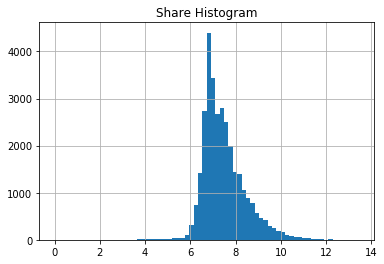

In [6]:
df['shares_log'] = np.log(df.shares)
fig = df.shares_log.hist(bins=70)
fig.set_title("Share Histogram")
# fig.set_ylabel("Number of shares")
# fig.set_xlabel("Shares")

In [7]:
# from math import exp
# df['exp'] = np.exp(df['shares_log'])
# fig = df.exp.hist(bins=70)
# fig.set_title("Share Histogram")
# fig.set_ylabel("Number of shares")
# fig.set_xlabel("Shares")

Text(0.5,0,'Shares')

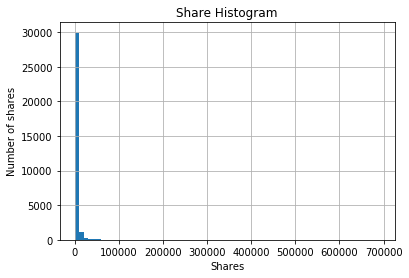

In [8]:
fig = df.shares.hist(bins=70)
fig.set_title("Share Histogram")
fig.set_ylabel("Number of shares")
fig.set_xlabel("Shares")

The boxplot should display the median of the data, the 75th and 25th quantile range, and the upper and lower boundaries described above. However, as we can see, there are a lot of points abot the bottom black line (upper bound line). This shows that there are a lot of data points that fall outside the interquantile range for outliers.

In [9]:
corr = df.corr()
corr.sort_values('shares')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_log
LDA_02,0.039930,0.083041,-0.006996,-0.003901,-0.005353,-0.017348,-0.086457,-0.095082,-0.094210,0.094980,...,-0.110156,0.038505,-0.067462,0.079022,-0.075985,-0.075930,0.061618,-0.080016,-0.062027,-0.164837
data_channel_is_world,0.048228,0.049470,-0.005543,-0.003143,-0.004053,-0.036211,-0.121494,-0.107616,-0.090214,0.074540,...,-0.125793,0.028015,-0.067283,0.070766,-0.063555,-0.081540,0.055696,-0.065565,-0.052876,-0.151027
avg_negative_polarity,-0.024264,-0.131471,0.003749,0.001066,0.000721,-0.152289,-0.061171,-0.076067,-0.118057,-0.327100,...,-0.269214,1.000000,0.749089,0.576821,-0.072039,0.085111,-0.006775,-0.071662,-0.035287,-0.033272
max_negative_polarity,0.006652,0.225185,-0.005169,0.000593,-0.004550,0.053327,0.035666,0.038541,0.025905,-0.198356,...,-0.001822,0.576821,0.077546,1.000000,-0.011489,0.001118,-0.002989,-0.011275,-0.025331,-0.013585
min_negative_polarity,-0.032667,-0.451339,0.010999,0.000942,0.006017,-0.263101,-0.124600,-0.136613,-0.139941,-0.279468,...,-0.364355,0.749089,1.000000,0.077546,-0.057581,0.074843,-0.010386,-0.058258,-0.021669,-0.021907
average_token_length,-0.071913,0.167041,0.023789,0.028398,0.030743,0.222429,0.126517,0.033275,-0.002311,1.000000,...,0.471283,-0.327100,-0.279468,-0.198356,-0.045475,-0.017153,0.029387,-0.040032,-0.020744,-0.044092
LDA_04,-0.069636,0.039318,-0.004713,-0.001890,-0.002804,-0.052893,0.129970,-0.022340,-0.128193,0.034106,...,0.041361,0.123079,0.105974,0.038440,-0.054425,0.022540,0.011096,-0.048602,-0.020512,0.040128
data_channel_is_tech,-0.047610,0.023855,-0.002587,-0.000457,-0.001309,-0.063295,0.165281,-0.007003,-0.095065,0.019609,...,0.029869,0.118037,0.117479,0.026897,-0.043829,0.023711,0.007364,-0.047036,-0.018387,0.049044
data_channel_is_entertainment,0.135506,0.062255,0.012155,0.012122,0.011715,-0.006113,0.027259,0.102882,0.146683,-0.041181,...,0.081289,-0.129368,-0.108874,-0.014733,0.046549,-0.012184,-0.050847,0.035079,-0.016286,-0.077487
weekday_is_wednesday,0.009237,-0.018444,-0.002454,-0.002731,-0.002304,-0.033273,-0.020745,-0.026782,-0.004743,-0.003278,...,-0.011992,0.008495,0.014922,-0.004680,-0.012664,-0.011859,0.006810,-0.014096,-0.014162,-0.036926


In [10]:
# get variable with positive correlations
column_names = corr.loc[corr.shares > 0].index
column_names = list(column_names)
column_names.remove('shares')
column_names.remove('shares_log')
print("Number of selected columns based on correlation:", len(column_names))

Number of selected columns based on correlation: 39


In [29]:
column_names

['n_tokens_title',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_socmed',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_03',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [36]:
X = df[column_names]
y = df['shares'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(25372, 39)

In [37]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

pred = regr.predict(X_test)
#pred = y_scaler.inverse_transform(pred)
#y_test = y_scaler.inverse_transform(y_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 99128919.76682986


In [46]:
corr.loc[corr.shares > 0].index

Index(['n_tokens_title', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_videos',
       'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_socmed',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_03',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'shares_log'],
      dtype='object')

In [31]:
cor()

NameError: name 'cor' is not defined

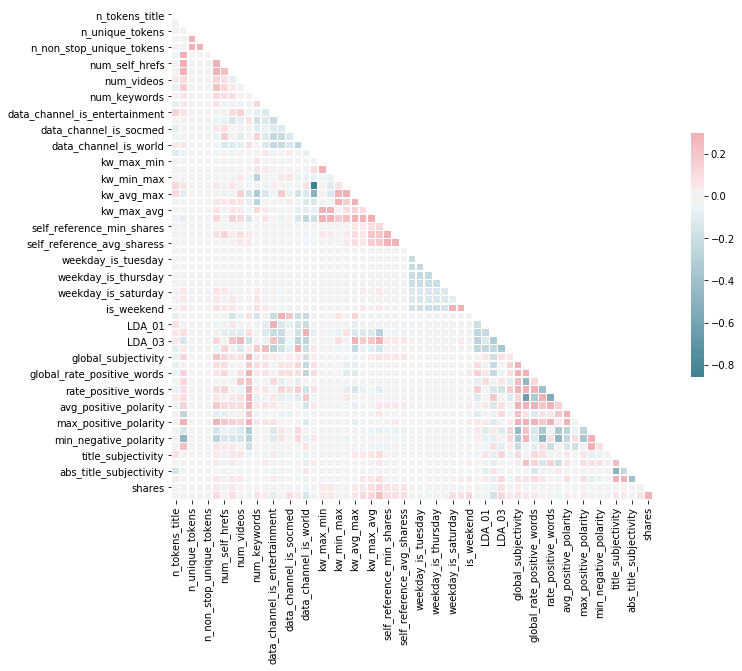

In [13]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
column_names

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',

In [14]:
# Axes = pd.plotting.scatter_matrix(df, figsize=(16, 10))
# #y labels
# [plt.setp(item.yaxis.get_label(), 'size', 7) for item in Axes.ravel()]
# #x labels
# [plt.setp(item.xaxis.get_label(), 'size', 7) for item in Axes.ravel()]
# plt.show()

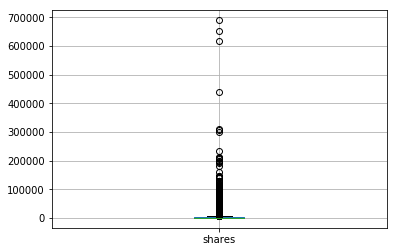

In [15]:
fig = df.boxplot("shares")

In [16]:
df.shares.describe()

count     31715.000000
mean       3364.264386
std       10742.884480
min           1.000000
25%         945.000000
50%        1400.000000
75%        2800.000000
max      690400.000000
Name: shares, dtype: float64

In [17]:
inter_quant_range = df.shares.quantile(0.75) -  df.shares.quantile(0.25)
lower_bound = df.shares.quantile(0.25) - (inter_quant_range * 1.5)
upper_bound = df.shares.quantile(0.75) + (inter_quant_range * 1.5)

inter_quant_range, lower_bound, upper_bound

(1855.0, -1837.5, 5582.5)

In fact, there are 3646 points that fall outside the interquantile outliers range. That is arond 11% of the total Shares. When looking for outliers, if the number of possible extreme points surpasses 15% of the total vairable number. It might be that these values are actually part of the data distribution. This, 11% outliers seem to be a reasonable quatity to consider.

In [18]:
print("Total number of shares {}".format(df.shape[0]))
print("Number of record with shares above 5582.5: {}".format(df[df.shares>upper_bound].shape[0]))
print("Percentage (%) of records with shares above 5582.5: {}".format(df[df.shares>upper_bound].shape[0]/df.shape[0]))

Total number of shares 31715
Number of record with shares above 5582.5: 3646
Percentage (%) of records with shares above 5582.5: 0.11496137474381207


Linear regression assumes a linear relationship between the input X and the target y.

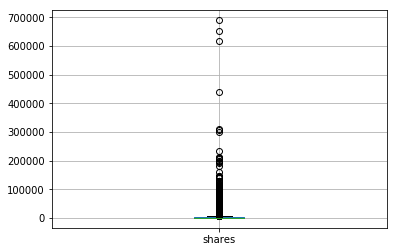

In [19]:
# remove the outliear and vizualize the quantiles
# df = df[df.shares<=upper_bound]

df_clean = df.copy()
#df.loc[df.shares > upper_bound, 'shares'] = upper_bound

fig = df.boxplot("shares")

In [20]:
#df = min_max_scalling(df)
#df.describe()

In [21]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [22]:
# Sepparate the target data from
y = df[['shares']].values
X = df.drop(['shares_log', 'shares'], axis=1).values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
from sklearn.preprocessing import PolynomialFeatures
print(X_train.shape)
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
print(X_train.shape)

(25372, 58)
(25372, 1770)


In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

pred = y_scaler.inverse_transform(pred)
y_test = y_scaler.inverse_transform(y_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 123310913.4032178


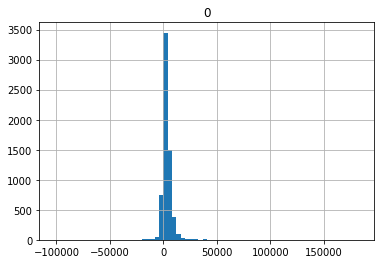

In [26]:
fig = pd.DataFrame(pred).hist(bins=70)
#fig.set_title("Share Histogram")
# fig.set_ylabel("Number of shares")
# fig.set_xlabel("Shares")

/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/thallessilva/Desktop/workspace/venv/py3/lib/python3.5/site-packages/matplotlib/ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


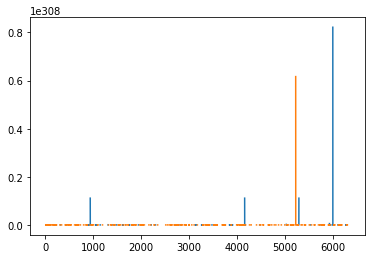

In [27]:
plt.plot(np.exp(y_test.squeeze()), label="y_test")
plt.plot(np.exp(pred.squeeze()), label="pred")
plt.show()

In [28]:
import LinearRegressor as linearModel

ImportError: No module named 'LinearRegressor'

In [ ]:
regressor = linearModel.LinearRegressor()
regressor.train(X_train, y_train, learning_rate=0.1, val_fraction=0.2, 
                batch_size=256, num_of_epochs=50, regularization=0.0, display_log=True)
pred = regressor.predict(X_test)

In [ ]:
plt.plot(y_test.squeeze(), label="y_test")
plt.plot(pred.squeeze(), label="pred")
plt.show()